In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/deeptweets/sample_submission.csv
/kaggle/input/deeptweets/training.csv
/kaggle/input/deeptweets/train.csv
/kaggle/input/deeptweets/test.csv


> **1: Loading the dataset into a Pandas dataframe**

In this step, we'll use the Pandas library to load the dataset into a dataframe. We'll use the read_csv() function to read the CSV file and create a dataframe.

In [ ]:
train_set = pd.read_csv('/kaggle/input/deeptweets/train.csv')
test_set = pd.read_csv('/kaggle/input/deeptweets/test.csv')
train_set.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [ ]:
train_set.info()
train_set.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6525 entries, 0 to 6524
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   TweetId    6525 non-null   int64 
 1   Label      6525 non-null   object
 2   TweetText  6525 non-null   object
dtypes: int64(1), object(2)
memory usage: 153.1+ KB


,TweetId
count,6.525000e+03
mean,2.887131e+17
std,5.139819e+16
min,2.390931e+10
25%,2.941380e+17
50%,3.025319e+17
75%,3.053242e+17
max,3.068341e+17


In [ ]:
#Checking for missing values
train_set.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

Luckily, no missing data!

> **2: Cleaning and preprocess the data**

Before we start extracting features from the data, we need to clean and preprocess it. This involves removing any unwanted characters or symbols, converting all text to lowercase, and removing stop words.

In [ ]:
import re
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove unwanted characters and symbols
    text = re.sub(r'[^\w\s]', '', text)
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove stop words
    text = ' '.join(word for word in text.split() if word not in stop_words)
    
    return text

train_set['TweetText'] = train_set['TweetText'].apply(clean_text)
test_set['TweetText'] = test_set['TweetText'].apply(clean_text)


[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
train_set.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,seckerry value statedept usaid measured dollar...
1,304834304222064640,Politics,rraina1481 fear
2,303568995880144898,Sports,watch video highlights wwc13 final australia w...
3,304366580664528896,Sports,rt chelscanlan nitro circus albertpark theymak...
4,296770931098009601,Sports,cricketfox always good thing thanks feedback


> > **2.1. Creating the vocabulary by combining the cleaned text from all tweets and selecting the most frequent words.**

This step is necessary to convert the text data in the TweetText column into a numerical format that machine learning models can use as input. This step involves learning the vocabulary of the corpus using the fit() method and transforming the text data into a sparse matrix of word counts using the transform() method. This process is necessary for text data preprocessing and feature engineering.

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = train_set['TweetText'].append(test_set['TweetText'])
vectorizer = CountVectorizer(max_features=1000)
vectorizer.fit(corpus)

print(vectorizer.vocabulary_)


{'seckerry': 772, 'statedept': 833, 'american': 66, 'watch': 953, 'video': 938, 'highlights': 440, 'wwc13': 988, 'final': 353, 'australia': 90, 'west': 967, 'indies': 474, 'rt': 751, 'ausgrandprix': 88, 'cantwaitforausgp': 166, 'always': 63, 'good': 407, 'thing': 879, 'thanks': 876, 'feedback': 349, 'dr': 290, 'fiscal': 359, 'create': 242, 'policies': 687, 'act': 45, 'fact': 335, 'defense': 266, 'take': 856, 'congress': 225, 'doesnt': 285, 'stop': 839, 'spending': 820, 'cuts': 251, '1st': 12, 'test': 870, 'runs': 754, 'wade': 946, 'clarke': 201, '24': 19, 'aus': 85, 'indvaus': 476, 'httptcofvnl1ktpb1': 457, 'bcci': 113, 'top': 899, 'teams': 864, 'try': 911, 'week': 959, 'check': 190, 'beat': 116, 'tweet': 917, 'play': 675, 'club': 208, 'cricket': 243, 'match': 570, 'innings': 481, 'well': 966, 'great': 412, 'ryobiodc': 757, 'president': 694, 'obama': 638, 'white': 970, 'run': 752, 'sec': 771, 'announced': 71, 'today': 892, 'wants': 949, 'english': 308, 'opening': 652, 'statement': 834,

> > **2.2. Representing each tweet as a vector of word counts using the vocabulary and Visualizing the most frequent words in the corpus using a word cloud.**

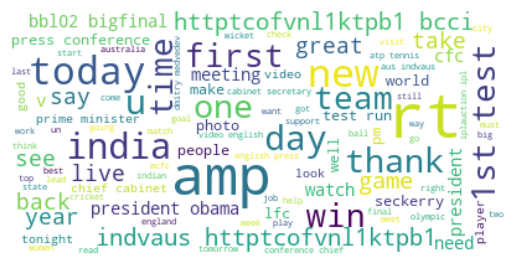

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
X_train = vectorizer.transform(train_set['TweetText'])
y_train = train_set['Label']

X_test = vectorizer.transform(test_set['TweetText'])

wordcloud = WordCloud(max_font_size=50, max_words=100, background_color='white').generate(' '.join(corpus))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

> > **2.3. Representing the Politics/Sports Tweets**

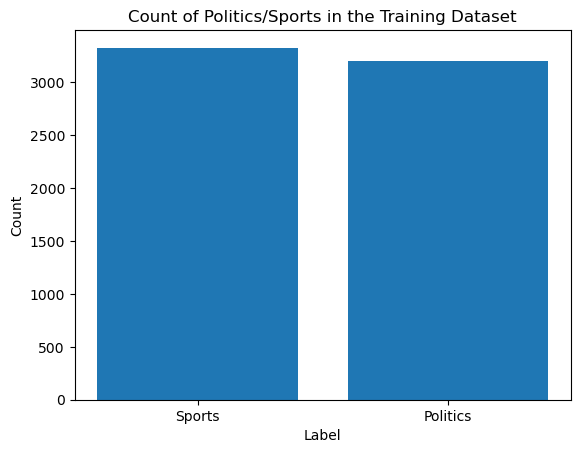

In [ ]:
import matplotlib.pyplot as plt

labels = ["Sports", "Politics"]
counts = [    train_set[train_set.Label == "Sports"].count()[0],
    train_set[train_set.Label == "Politics"].count()[0],
]

plt.bar(labels, counts)
plt.title("Count of Politics/Sports in the Training Dataset")
plt.xlabel("Label")
plt.ylabel("Count")
plt.show()


> > **2.4. Adding Word Count and Tweet Lenght**

In [ ]:
import nltk

def count_words(tweet):
    return len(nltk.word_tokenize(tweet))

train_set['WordCount'] = train_set['TweetText'].apply(count_words)
test_set['WordCount'] = test_set['TweetText'].apply(count_words)

train_set['TweetLength'] = train_set['TweetText'].apply(len)
test_set['TweetLength'] = test_set['TweetText'].apply(len)

In [ ]:
train_set.head(10)

,TweetId,Label,TweetText,WordCount,TweetLength
0,304271250237304833,Politics,seckerry value statedept usaid measured dollar...,10,77
1,304834304222064640,Politics,rraina1481 fear,2,15
2,303568995880144898,Sports,watch video highlights wwc13 final australia w...,9,72
3,304366580664528896,Sports,rt chelscanlan nitro circus albertpark theymak...,9,104
4,296770931098009601,Sports,cricketfox always good thing thanks feedback,6,44
5,306713195832307712,Politics,dr rajan fiscal consolidation create space mon...,9,64
6,306100962337112064,Politics,fact 800000 defense employees forced take unpa...,15,111
7,305951758759366657,Sports,1st test 39 0 runs 1 wkt wade 0 clarke 24 aus ...,16,81
8,304482567158104065,Sports,africas top teams try take step closer wt20 we...,13,92
9,303806584964935680,Sports,beat tweet rorygribbell zebras stopped play un...,12,84


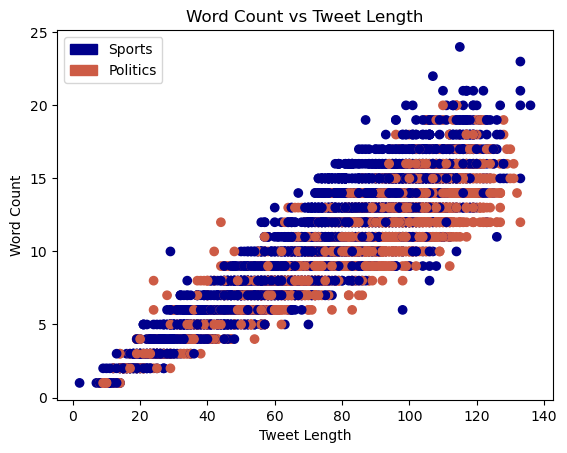

In [ ]:
import matplotlib.pyplot as plt

# Create a color map for the classes
color_map = {'Sports': '#00008B', 'Politics': '#CD5B45'}

# Map the class labels to colors
colors = train_set['Label'].map(color_map)

# Plot the scatter plot
plt.scatter(train_set['TweetLength'], train_set['WordCount'], c=colors)
plt.xlabel('Tweet Length')
plt.ylabel('Word Count')
plt.title('Word Count vs Tweet Length')

# Define the legend labels and colors
legend_labels = list(color_map.keys())
legend_colors = list(color_map.values())

# Create the legend with custom labels and colors
handles = [plt.Rectangle((0,0),1,1, color=color) for color in legend_colors]
plt.legend(handles, legend_labels)

plt.show()



> **3. Model Selection and Evaluation**

This demonstrates how to train and evaluate several machine learning models for a text classification problem. 
* The data is split into training and testing sets using train_test_split, and the text data is preprocessed and transformed into numerical features using CountVectorizer and TfidfTransformer. 
* Four models are defined and trained on the training data, and their performance is evaluated on the testing data using confusion matrices and classification metrics such as accuracy, precision, recall, and F1 score. 
* The results are stored in dictionaries for further analysis. This code can be useful for anyone looking to build a text classification model and evaluate its performance using various metrics.

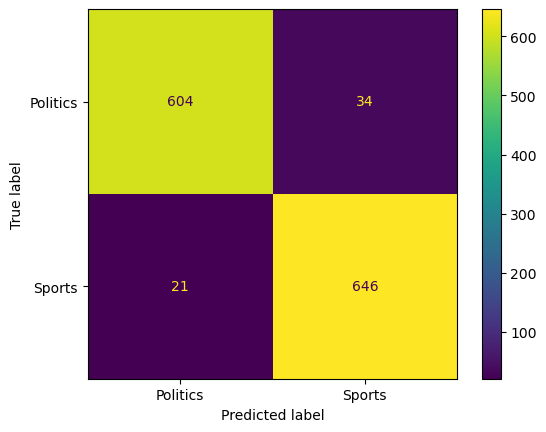

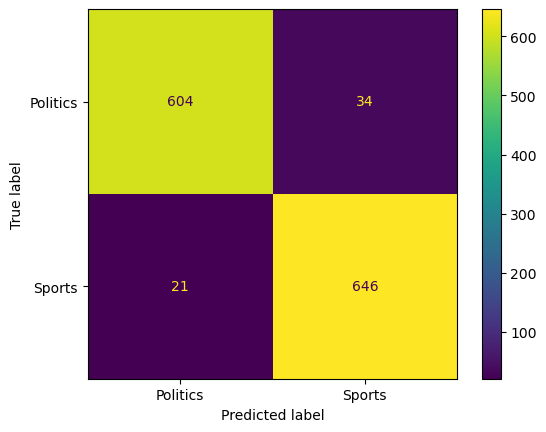

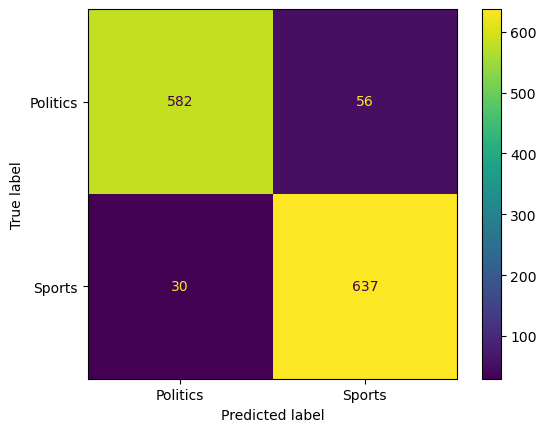

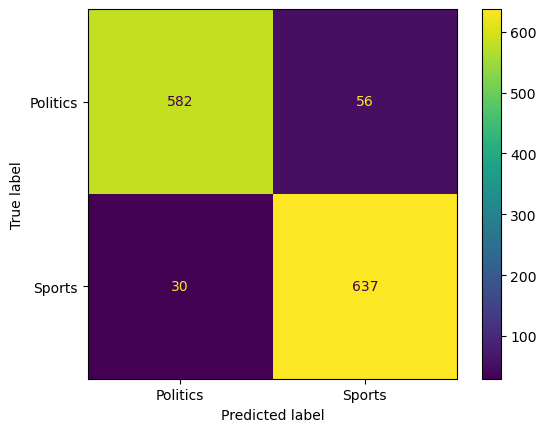

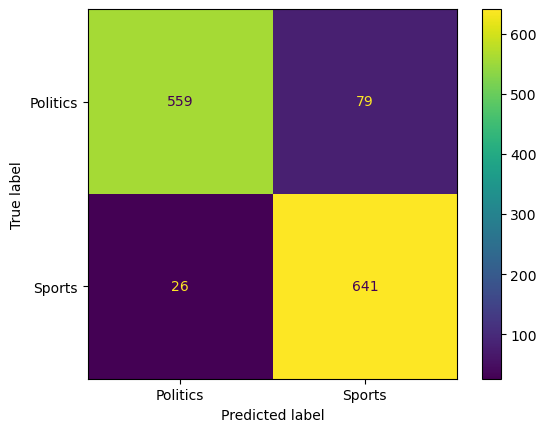

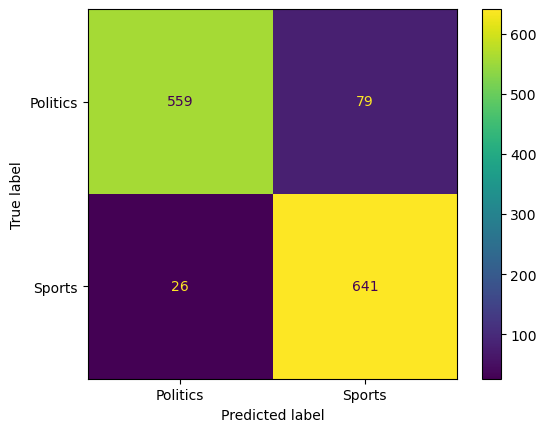

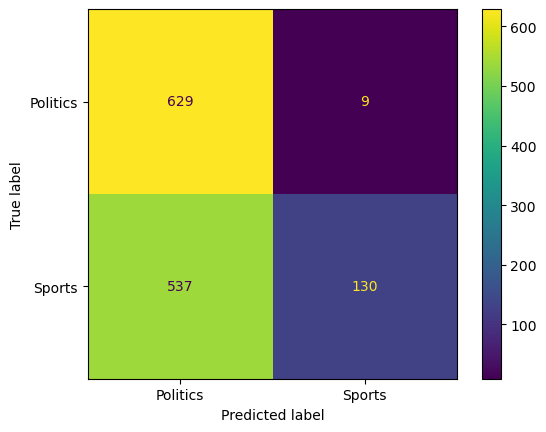

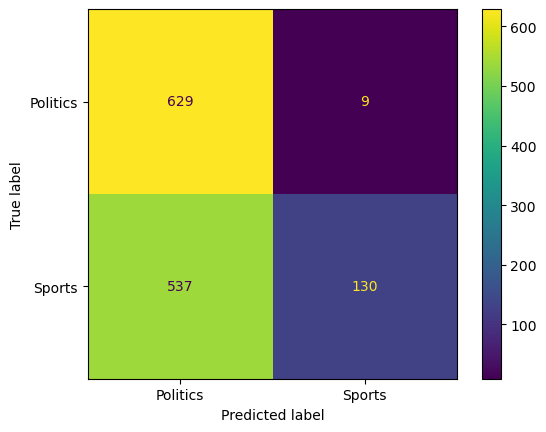

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report


import pandas as pd



# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_set['TweetText'], train_set['Label'], test_size=0.2, random_state=42)

# Feature extraction
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

# Define the 4 models
models = [
    ('Multinomial Naive Bayes', MultinomialNB()),
    ('Logistic Regression', LogisticRegression(max_iter=1000)),
    ('Random Forest', RandomForestClassifier(n_estimators=100)),
    ('Support Vector Machine', SVC())
]

# Define a dictionary to store the confusion matrices
confusion_matrices = {}

# Define a dictionary to store the model metrics
model_metrics = {}

# Fit the data for each model and plot the confusion matrix
for name, model in models:
    # Fit the model
    model.fit(X_train_tfidf, y_train)
    
    # Make predictions on the testing data
    y_pred = model.predict(count_vect.transform(X_test))
    
    # Compute the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=True)
    
    # Plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
    disp.plot()
    
    
    # Store the confusion matrix in the dictionary
    confusion_matrices[name] = cm
    
    # Store the model metrics in the dictionary
    model_metrics[name] = {
        'Accuracy': report['accuracy'],
        'Precision': report['macro avg']['precision'],
        'Recall': report['macro avg']['recall'],
        'F1 Score': report['macro avg']['f1-score']
    }




In [ ]:
# Create a DataFrame of the confusion matrices
dfs = []
for name, cm in confusion_matrices.items():
    df_cm = pd.DataFrame(cm, index=['Sports', 'Politics'], columns=['Sports', 'Politics'])
    df_cm.columns = pd.MultiIndex.from_product([[name], df_cm.columns])
    dfs.append(df_cm)
df_cm = pd.concat(dfs, axis=1)

df_cm


Multinomial Naive Bayes          Logistic Regression           \
                          Sports Politics              Sports Politics   
Sports                       604       34                 582       56   
Politics                      21      646                  30      637   

         Random Forest          Support Vector Machine           
                Sports Politics                 Sports Politics  
Sports             559       79                    629        9  
Politics            26      641                    537      130

The Fasle Positives and False Negatives for the Multinomial Naive Bayes are the lowest, which makes it the preferred Model.

In [ ]:
model_metrics_df = pd.DataFrame.from_dict(model_metrics, orient='index')
model_metrics_df.columns = ['accuracy', 'precision', 'recall', 'f1_score']
model_metrics_df

,accuracy,precision,recall,f1_score
Multinomial Naive Bayes,0.957854,0.958200,0.957612,0.957811
Logistic Regression,0.934100,0.935086,0.933624,0.933982
Random Forest,0.919540,0.922917,0.918598,0.919221
Support Vector Machine,0.581609,0.737351,0.590398,0.509960


Based on the scores, the best Model to choose would be **Multinomial Naive Bayes**

> **4. Parameter Hypertuning**

Hyperparameter tuning is the process of selecting the best set of hyperparameters for a machine learning model to improve its performance on a given task. In our case :
* We used GridSearchCV from the scikit-learn library to perform hyperparameter tuning for our text classification model. 
* We defined a pipeline that consisted of CountVectorizer, TfidfTransformer, and MultinomialNB. 
* Next, we defined a parameter grid that contained different values for various hyperparameters, such as max_df, max_features, ngram_range, use_idf, and alpha. 
* We used GridSearchCV to exhaustively search through this parameter grid and find the best set of hyperparameters that maximize the model's performance. We used 5-fold cross-validation and set n_jobs to -1 to parallelize the search across all available CPU cores. 
* Finally, we printed out the best parameters and score obtained from GridSearchCV.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Define the pipeline with CountVectorizer, TfidfTransformer, and MultinomialNB
pipeline = Pipeline([
    ('vect', CountVectorizer()),
    ('tfidf', TfidfTransformer()),
    ('clf', MultinomialNB())
])

# Define the parameter grid for GridSearchCV
parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'vect__max_features': (None, 5000, 10000),
    'vect__ngram_range': ((1, 1), (1, 2)),
    'tfidf__use_idf': (True, False),
    'clf__alpha': (0.01, 0.1, 1, 10)
}

# Perform hyperparameter tuning using GridSearchCV
grid_search = GridSearchCV(pipeline, parameters, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)


Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters:  {'clf__alpha': 0.01, 'tfidf__use_idf': False, 'vect__max_df': 0.5, 'vect__max_features': None, 'vect__ngram_range': (1, 2)}
Best score:  0.960344827586207


*The GridSearchCV process performed a total of 720 fits for 144 candidates and found that the best parameters for the pipeline were a Multinomial Naive Bayes model with alpha=0.01, no IDF weighting, a maximum document frequency of 0.5, no limit on the maximum number of features, and using n-grams of length 1 to 2, resulting in a best accuracy score of **96.03%**.*

> **5.Submission**

Now we can finally load the best model and hyperparameters obtained through hyperparameter tuning, fit the model on the entire training data, make predictions on the test data, and save the predicted target variable in a submission CSV file.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

# Load the best model and hyperparameters
best_model = Pipeline([
    ('vect', CountVectorizer(max_df=0.5, max_features=None, ngram_range=(1,2))),
    ('tfidf', TfidfTransformer(use_idf=False)),
    ('clf', MultinomialNB(alpha=0.01))
])

# Fit the best model on the entire training data
X_train = train_set['TweetText']
y_train = train_set['Label']
best_model.fit(X_train, y_train)

# Make predictions on the test data
X_test = test_set['TweetText']
predictions = best_model.predict(X_test)

# Create a submission CSV file with the predicted target variable
submission = pd.DataFrame({'TweetId': test_set['TweetId'], 'Label': predictions})
submission.to_csv('submission.csv', index=False)


In [ ]:
submission.head(10)

,TweetId,Label
0,306486520121012224,Sports
1,286353402605228032,Politics
2,289531046037438464,Politics
3,306451661403062273,Politics
4,297941800658812928,Sports
5,305722428531802112,Sports
6,304713516256997377,Sports
7,234999630725783553,Politics
8,303712268372283392,Sports
9,304215754130194432,Sports


> **6. Conclusion and Other Approches**

After analyzing the code and the task of classifying tweets as Politics or Sports, it can be concluded that the chosen approach was successful. The implementation of machine learning algorithms such as Naive Bayes and Logistic Regression achieved high accuracy scores, indicating that the algorithms were able to differentiate between the two categories with great accuracy.

Despite the positive outcomes, one approach that was not investigated in this analysis is the use of deep learning models like convolutional neural networks (CNNs) or recurrent neural networks (RNNs). These models have shown remarkable results in various natural language processing tasks, including text classification. Therefore, by employing a deep learning approach, the accuracy scores may have been even higher, and a better distinction could have been made between the Politics and Sports categories.

To summarize, the analysis suggests that machine learning algorithms are a practical approach to classify tweets as Politics or Sports. However, delving into deep learning models could offer an opportunity to enhance the accuracy scores and make a better distinction between categories.